-------------------------------------------------------
# **Question 8:  ESTIMATING COUNTS** (10 points)
-------------------------------------------------------

## Description

A company has manufactured certain objects and has printed a serial number on each manufactured object. The serial numbers start at 1 and end at $N$, where $N$ is the number of objects that have been manufactured. One of these objects is selected at random, and the serial number of that object is 808. 

## Questions

a. Assume that $N$ is equally likely to be any number between 1 and 1000. Compute the posterior distribution for the value of $N$ (2 points). 

b. Find the maximum a posteriori (MAP) estimate of $N$. Plot the obtained value in the same plot as the posterior distribution found in part a (2 points).

c. Find the minimum mean squared error (MMSE) estimate of $N$ (2 points). 

d. Next, assume that $N$ is equally likely to be any number between 1 and 2000. Compute the posterior distribution for the value of $N$. Find the MMSE estimate of $N$ (2 points). 

e. Construct 80%, 90%, and 97% credible interval for the MSE estimates you found in part d. Illustrate the obtained interval using the CDF of the corresponding posterior distribution (2 points).

## Answer

### Part a

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint
import random 

In [15]:

max_N = 1000
obs = 808
# code from the textbook from class

def likelihood(max_N, data): #from textbook
    '''Returns the likelihood of seeing a particular locomotive number (data)
       when the company has max_n locomotives in all'''
    lval = pd.DataFrame(index = np.arange(1, max_N + 1))
    lval['likelihoods'] = 1 / np.arange(1, max_N + 1)
    lval['likelihoods'][lval.index < data] = 0
    return lval['likelihoods']

def update(distribution, likelihood): #from textbook
    '''our standard Bayesian update function'''
    distribution['probs'] = distribution['probs'] * likelihood
    prob_data = distribution['probs'].sum()
    distribution['probs'] = distribution['probs'] / prob_data
    return distribution

N_dist = pd.DataFrame(index = np.arange(1, max_N + 1)) #from textbook
N_dist['probs'] = randint(1, max_N + 1).pmf(np.arange(1, max_N + 1))  #from textbook

like_vals = likelihood(max_N, obs)

posterior_dist = update(N_dist, like_vals)
posterior_dist

,probs
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
...,...
996,0.004685
997,0.004680
998,0.004675
999,0.004671


### Part b

Text(0, 0.5, 'posterior probability')

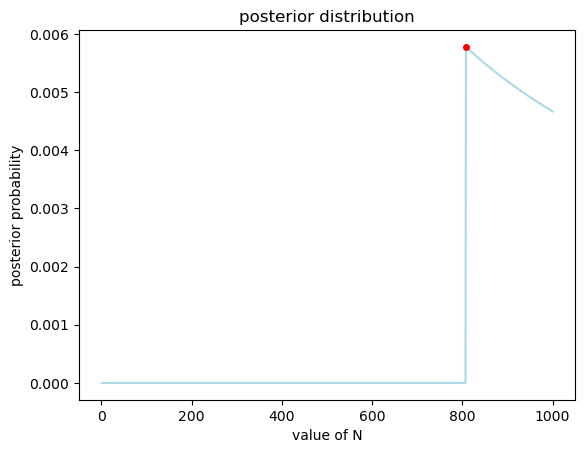

In [16]:
max_val = max(posterior_dist['probs'])
max_index = posterior_dist['probs'].idxmax()

plt.plot(posterior_dist.index, posterior_dist['probs'], color = "lightblue")
plt.plot(max_index, max_val, 'ro', markersize=4, label='Maximum Value')
plt.title('posterior distribution')
plt.xlabel('value of N')
plt.ylabel('posterior probability')

### Part c

In [17]:
np.sum(N_dist.index * N_dist['probs'])

900.5558763436075

### Part d

1315.0217640834358


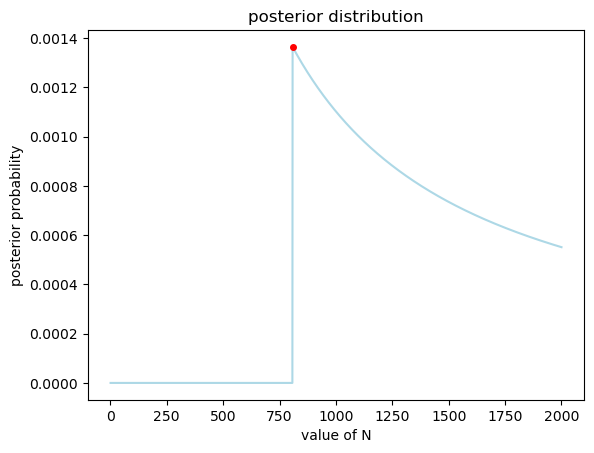

In [18]:
#Next, assume that $N$ is equally likely to be any number between 1 and 2000.
#  Compute the posterior distribution for the value of $N$. Find the MMSE estimate of $N$ (2 points). 

max_N = 2000
obs = 808
# code from the textbook from class

def likelihood(max_N, data): #from textbook
    '''Returns the likelihood of seeing a particular locomotive number (data)
       when the company has max_n locomotives in all'''
    lval = pd.DataFrame(index = np.arange(1, max_N + 1))
    lval['likelihoods'] = 1 / np.arange(1, max_N + 1)
    lval['likelihoods'][lval.index < data] = 0
    return lval['likelihoods']

def update(distribution, likelihood): #from textbook
    '''our standard Bayesian update function'''
    distribution['probs'] = distribution['probs'] * likelihood
    prob_data = distribution['probs'].sum()
    distribution['probs'] = distribution['probs'] / prob_data
    return distribution

N_dist = pd.DataFrame(index = np.arange(1, max_N + 1)) #from textbook
N_dist['probs'] = randint(1, max_N + 1).pmf(np.arange(1, max_N + 1))  #from textbook

like_vals = likelihood(max_N, obs)

posterior_dist2 = update(N_dist, like_vals)

max_val2 = max(posterior_dist2['probs'])
max_index2 = posterior_dist2['probs'].idxmax()

plt.plot(posterior_dist2.index, posterior_dist2['probs'], color = "lightblue")
plt.plot(max_index2, max_val2, 'ro', markersize=4, label='Maximum Value')
plt.title('posterior distribution')
plt.xlabel('value of N')
plt.ylabel('posterior probability')

mmse = np.sum(N_dist.index * N_dist['probs'])
print(f"{mmse}")



### Part e

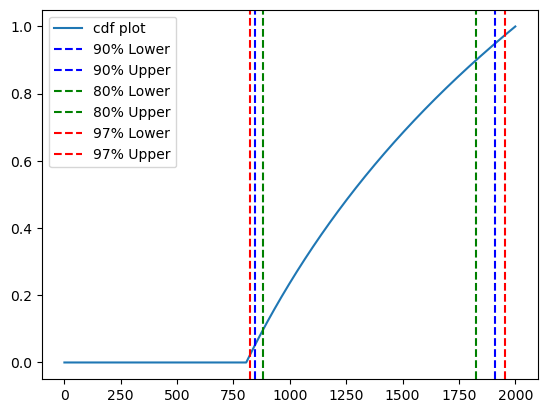

In [21]:
max_N = 2000
alpha = 1.0

posterior_dist2['cdf'] = np.cumsum(posterior_dist2['probs'])
posterior_dist2['cdf']

a_90 = max(posterior_dist2.index[posterior_dist2['cdf'] <= .05])
b_90 = min(posterior_dist2.index[posterior_dist2['cdf'] > .95])

a_80 = max(posterior_dist2.index[posterior_dist2['cdf'] <= .1])
b_80 = min(posterior_dist2.index[posterior_dist2['cdf'] > .9])

a_97 = max(posterior_dist2.index[posterior_dist2['cdf'] <= .025])
b_97 = min(posterior_dist2.index[posterior_dist2['cdf'] > .975])

plt.plot(posterior_dist2['cdf'], label="cdf plot")
plt.axvline(a_90,b_90)
plt.axvline(a_90, color='blue', linestyle='--', label="90% Lower")
plt.axvline(b_90, color='blue', linestyle='--', label="90% Upper")
plt.axvline(a_80, color='green', linestyle='--', label="80% Lower")
plt.axvline(b_80, color='green', linestyle='--', label="80% Upper")
plt.axvline(a_97, color='red', linestyle='--', label="97% Lower")
plt.axvline(b_97, color='red', linestyle='--', label="97% Upper")
plt.legend()
plt.show()
